In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
data = pd.read_csv("F:\Machine Learning\Decision_Tree\data_cleaned.csv")

In [35]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [37]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.75,random_state=52,stratify=y)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(random_state=10)

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(x_test)

In [19]:
model.score(x_train,y_train)

0.9954954954954955

In [20]:
model.score(x_test,y_test)

0.757847533632287

There is a lot of differnece in score of train and test data set which not desirable, so lets change some parameters


In [25]:
y_test_prob = model.predict_proba(x_test)[:,1]

In [26]:
y_test_prob

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.     

In [30]:
y_new = []
for i in range(len(y_test_prob)):
    if y_test_prob[i] <= 0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_new)

0.7518684603886397

In [41]:
data.shape



(891, 25)

## Changing the max_depth

In [53]:
train_score = []
test_score = []
for i in range(1,11):
    model1 = DecisionTreeClassifier(max_depth=i,random_state=10)
    model1.fit(x_train,y_train)
    train_score.append(model1.score(x_train,y_train))
    test_score.append(model1.score(x_test,y_test))

In [54]:
frame = pd.DataFrame({'Train score':train_score,'Test score':test_score},index=range(1,11))

In [55]:
frame

,Train score,Test score
1,0.792793,0.784753
2,0.810811,0.787743
3,0.833333,0.811659
4,0.864865,0.807175
5,0.873874,0.795217
6,0.887387,0.799701
7,0.918919,0.786248
8,0.950450,0.754858
9,0.972973,0.759342
10,0.977477,0.769806


In [56]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


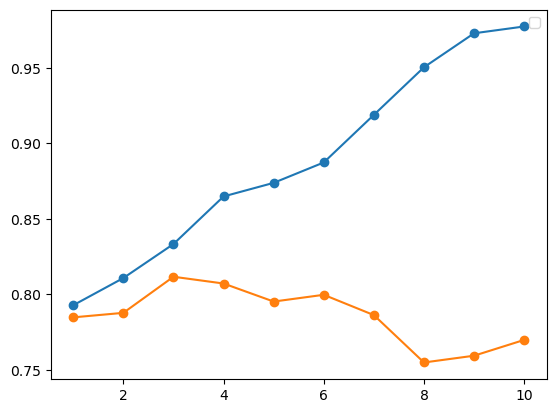

In [57]:
plt.Figure(figsize=(15,8),dpi=120,facecolor='w',edgecolor='b')
plt.plot(frame.index,frame['Train score'],marker = 'o')
plt.plot(frame.index,frame['Test score'],marker = 'o')
plt.legend()
plt.show()


In [58]:
model3 = DecisionTreeClassifier(max_depth=6,random_state=10)

In [59]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [60]:
y_predict = model3.predict(x_test)

In [62]:
model3.score(x_test,y_test)

0.7997010463378177

So now score has increased some what so we can try this by changing other parameters like max_leaf_nodes, min_samples_split, min_samples_leaf.

## Let's try changing minimum samples split

In [65]:
train_score2 = []
test_score2 = []
for i in range(1,7):
    for j in range(50,61):
        model4 = DecisionTreeClassifier(max_depth=i,min_samples_split=j,random_state=10) 
        model4.fit(x_train,y_train)
        train_score2.append(model4.score(x_train,y_train))
        test_score2.append(model4.score(x_test,y_test))

In [71]:
len(train_score2)

66

In [73]:
len(test_score2 )


66

In [75]:
frame2 = pd.DataFrame({'Train score':train_score2,'Test score':test_score2},index=range(1,67))


In [76]:
frame2

,Train score,Test score
1,0.792793,0.784753
2,0.792793,0.784753
3,0.792793,0.784753
4,0.792793,0.784753
5,0.792793,0.784753
...,...,...
62,0.810811,0.787743
63,0.810811,0.787743
64,0.810811,0.787743
65,0.810811,0.787743


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


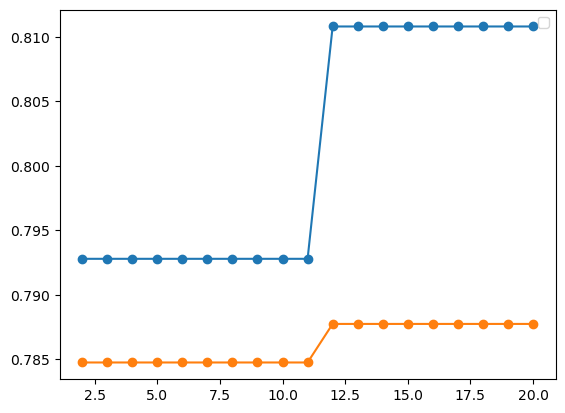

In [79]:
plt.Figure(figsize=(15,8),dpi=120,facecolor='w',edgecolor='b')
plt.plot(frame2.index[1:20],frame2['Train score'][1:20],marker = 'o')
plt.plot(frame2.index[1:20],frame2['Test score'][1:20],marker = 'o')
plt.legend()
plt.show()

In [82]:
model4 = DecisionTreeClassifier(max_depth=6,min_samples_split=12,random_state=10)


In [83]:
model4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=12, random_state=10)

In [84]:
model4.score(x_test,y_test)

0.804185351270553

so You can see the increase in score of the model. This way we can improve the score by changing different parameters.